In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df_2007 = pd.read_csv("mls-salaries-2007.csv")
df_2008 = pd.read_csv("mls-salaries-2008.csv")
df_2009 = pd.read_csv("mls-salaries-2009.csv")
df_2010 = pd.read_csv("mls-salaries-2010.csv")
df_2011 = pd.read_csv("mls-salaries-2011.csv")
df_2012 = pd.read_csv("mls-salaries-2012.csv")
df_2013 = pd.read_csv("mls-salaries-2013.csv")
df_2014 = pd.read_csv("mls-salaries-2014.csv")
df_2015 = pd.read_csv("mls-salaries-2015.csv")
df_2016 = pd.read_csv("mls-salaries-2016.csv")
df_2017 = pd.read_csv("mls-salaries-2017.csv")
df_2007['Ano'] = 2007
df_2008['Ano'] = 2008
df_2009['Ano'] = 2009
df_2010['Ano'] = 2010
df_2011['Ano'] = 2011
df_2012['Ano'] = 2012
df_2013['Ano'] = 2013
df_2014['Ano'] = 2014
df_2015['Ano'] = 2015
df_2016['Ano'] = 2016
df_2017['Ano'] = 2017
df_total = pd.concat([df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017])
df_inflacao = pd.read_excel("inflação.xlsx")

In [124]:
df_campeoes = pd.read_excel("campeoes mls.xlsx")
df_campeoes.replace(["Los Angeles Galaxy",'DC United','Real Salt Lake',
                     'New England Revolution','Seattle Sounders FC','Houston Dynamo',
                    'San Jose Earthquakes','Sporting Kansas City','Columbus Crew','Seattle Sounders',
                     'New York Red Bulls','D.C. United','Colorado Rapids','FC Dallas','Portland Timbers','Toronto FC'],
                 ['LA','DC','RSL','NE','SEA','HOU','SJ','KC','CLB','SEA','NYRB','DC','COL','DAL','POR','TOR'],inplace=True)

df_campeoes

,Ano,MLS Cup,MLS Supporters' Shield,U.S. Open Cup *
0,2007,HOU,DC,NE
1,2008,CLB,CLB,DC
2,2009,RSL,CLB,SEA
3,2010,COL,LA,SEA
4,2011,LA,LA,SEA
5,2012,LA,SJ,KC
6,2013,KC,NYRB,DC
7,2014,LA,SEA,SEA
8,2015,POR,NYRB,KC
9,2016,SEA,DAL,DAL


In [3]:
df_acumulado = df_total.groupby("Ano").sum()['base_salary'].reset_index()
df_acumulado['Diferença'] = df_acumulado.pct_change()['base_salary']

In [4]:
df_acumulado

,Ano,base_salary,Diferença
0,2007,3.847833e+07,NaN
1,2008,4.292950e+07,0.115680
2,2009,4.689920e+07,0.092470
3,2010,6.410895e+07,0.366952
4,2011,7.499108e+07,0.169744
5,2012,8.649280e+07,0.153375
6,2013,8.480920e+07,-0.019465
7,2014,1.166924e+08,0.375940
8,2015,1.517671e+08,0.300574
9,2016,1.610863e+08,0.061405


In [5]:
df_acumulado['Ano']

0     2007
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
Name: Ano, dtype: int64

In [6]:
df_inflacao['Inflação']

0     0.0408
1     0.0009
2     0.0272
3     0.0150
4     0.0296
5     0.0174
6     0.0150
7     0.0076
8     0.0073
9     0.0207
10    0.0211
Name: Inflação, dtype: float64

In [7]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## 1 - Fazer um gráfico com a variação anual do salário dos jogadores

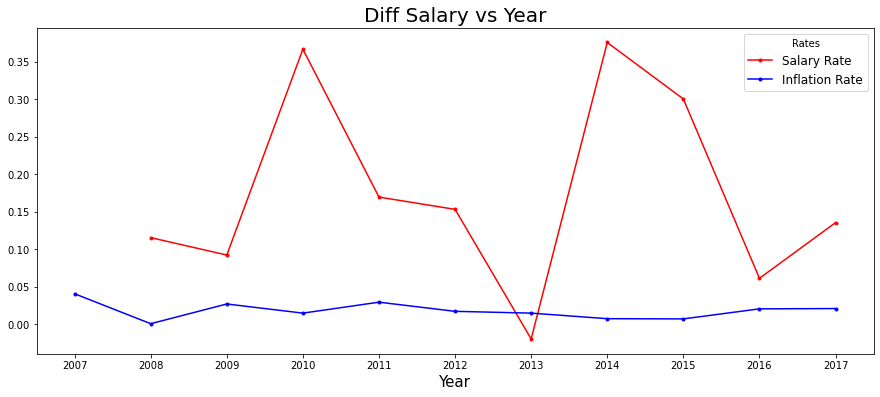

In [8]:
figura,ax = plt.subplots(figsize=(15,6))
plt.style.use('tableau-colorblind10')
x = df_acumulado['Ano']
y = df_acumulado['Diferença']
y_1 = df_inflacao['Inflação']
grafico_linha = ax.plot(x,y,'r.-',label='Salary Rate') 
grafico_linha = ax.plot(x,y_1,'b.-',label='Inflation Rate')
ax.set_title("Diff Salary vs Year",{"fontsize":20})
ax.set_xlabel("Year",{"fontsize":15})
ax.set_xticks(range(2007,2018)) #Colocando o tamanho do x tick
ax.set_xticklabels(df_acumulado['Ano'].to_list()) #Colocando quem são os x tick
plt.legend(title='Rates',fontsize=12)
pd.set_option("display.precision",2)

## 2 - Fazer um bloxplot com uma posição dos salários do jogadores.

In [36]:
df_2017

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Ano
0,ATL,Almiron,Miguel,M,1.91e+06,2.30e+06,2017
1,ATL,Ambrose,Mikey,D,6.56e+04,6.56e+04,2017
2,ATL,Asad,Yamil,M,1.50e+05,1.50e+05,2017
3,ATL,Bloom,Mark,D,9.92e+04,1.07e+05,2017
4,ATL,Carleton,Andrew,F,6.50e+04,7.74e+04,2017
...,...,...,...,...,...,...,...
611,VAN,Tornaghi,Paolo,GK,8.00e+04,8.00e+04,2017
612,VAN,Waston,Kendall,D,3.50e+05,3.68e+05,2017
613,VAN,Williams,Sheanon,D,1.75e+05,1.84e+05,2017
614,NaN,Babouli,Mo,F,5.41e+04,5.41e+04,2017


In [39]:
df_club = df_2017.groupby("club").sum()

df_forward = df_total[(df_total['position']=="F") & (df_total['Ano']==2017)]
df_forward_club = df_forward.groupby("club").sum()['base_salary'].reset_index()
df_forward_club.max()

club                  VAN
base_salary    10831536.5
dtype: object

In [70]:
pd.set_option("display.precision",2)
df_2017.groupby('position').sum()['base_salary']

position
D      3.08e+07
D-M    1.89e+06
F      5.34e+07
F-M    2.02e+06
F/M    1.25e+05
GK     9.52e+06
M      7.97e+07
M-D    8.76e+05
M-F    4.05e+06
M/F    5.50e+05
Name: base_salary, dtype: float64

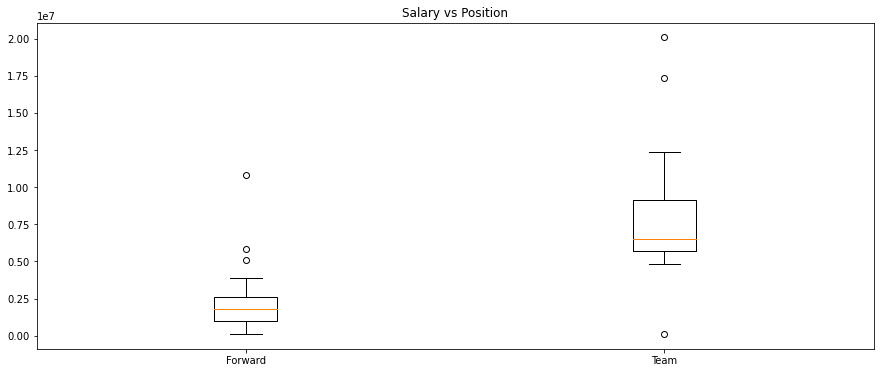

In [44]:
fig,ax = plt.subplots(figsize=(15,6))
data = [df_forward_club['base_salary'],df_club['base_salary']]
ax.set_title("Salary vs Position")
ax.boxplot(data)
ax.set_xticklabels(['Forward','Team'])
pd.set_option("display.precision",2)

In [26]:
pd.set_option("display.precision",2)

df_forward

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Ano
4,ATL,Carleton,Andrew,F,6.50e+04,7.74e+04,2017
11,ATL,Jones,Kenwyne,F,3.90e+05,4.13e+05,2017
16,ATL,Martinez,Josef,F,9.24e+05,1.04e+06,2017
21,ATL,Peterson,Jacob,F,1.65e+05,1.65e+05,2017
24,ATL,Rochez,Bryan,F,2.00e+05,2.80e+05,2017
...,...,...,...,...,...,...,...
570,TOR,Hamilton,Jordan,F,6.95e+04,8.20e+04,2017
579,TOR,Ricketts,Tosaint,F,1.80e+05,1.93e+05,2017
591,VAN,Greig,Kyle,F,6.50e+04,6.68e+04,2017
599,VAN,Montero,Fredy,F,1.40e+06,1.80e+06,2017


##  3- Fazer um gráfico com o salário por time em 2017

<BarContainer object of 23 artists>

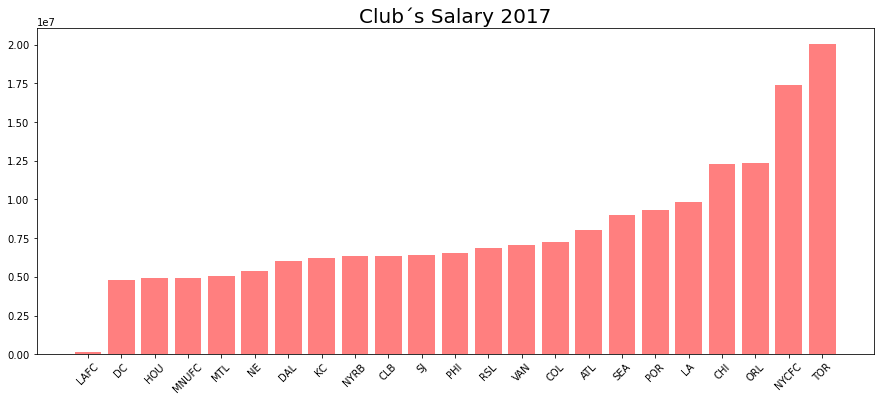

In [69]:
df_club_2017 = df_2017.groupby('club').sum()['base_salary'].reset_index().sort_values(by='base_salary')
plt.style.use('tableau-colorblind10')
fig,ax=plt.subplots(figsize=(15,6))
ax.set_title("Club´s Salary 2017",{'fontsize':20})
plt.xticks(rotation=45)
ax.bar(df_club_2017['club'],df_club_2017['base_salary'],alpha=0.5,color='r')

## 4 - Buscar o campeão de cada ano e tentar fazer um paralelo com o salário


In [125]:
df_campeoes
df_campeoes = df_campeoes.rename(columns={"MLS Cup":"club"})

In [126]:
df_campeoes = df_campeoes[['Ano','club']]

df_campeoes 

,Ano,club
0,2007,HOU
1,2008,CLB
2,2009,RSL
3,2010,COL
4,2011,LA
5,2012,LA
6,2013,KC
7,2014,LA
8,2015,POR
9,2016,SEA


In [127]:
df_campeoes_salary = pd.merge(df_campeoes,df_total,on=['Ano','club'],how='left')

In [128]:
df_campeoes_salary = df_campeoes_salary.groupby(["club",'Ano']).sum()['base_salary'].reset_index().sort_values(by='Ano')

In [129]:
df_campeoes_salary.set_index("Ano",inplace=True)

In [130]:
df_media = df_total.groupby("Ano").median()['base_salary']
df_max = df_total.groupby("Ano").max()['base_salary']
df_min = df_total.groupby("Ano").min()['base_salary']

<ipython-input-130-444110656028>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_max = df_total.groupby("Ano").max()['base_salary']
<ipython-input-130-444110656028>:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df_min = df_total.groupby("Ano").min()['base_salary']


In [131]:
df_media=pd.DataFrame(df_media)
df_max=pd.DataFrame(df_max)
df_min=pd.DataFrame(df_min)

In [132]:
df_campeoes_salary_comparison = pd.concat([df_campeoes_salary,df_media,df_max,df_min],axis=1)

In [141]:
df_campeoes_salary_comparison.columns=['Club','Champion Salary','Median Salary','Max Salary','Min Salary']

In [142]:
df_campeoes_salary_comparison

,Club,Champion Salary,Median Salary,Max Salary,Min Salary
Ano,,,,,
2007,HOU,2.35e+06,45050.25,5.50e+06,12900.00
2008,CLB,2.09e+06,46702.50,5.50e+06,12900.00
2009,RSL,1.95e+06,65000.00,5.50e+06,15300.00
2010,COL,2.43e+06,75000.00,5.54e+06,31250.04
2011,LA,1.28e+07,67500.00,5.50e+06,32600.00
2012,LA,1.08e+07,74260.00,5.00e+06,33750.00
2013,KC,3.21e+06,75000.00,4.91e+06,35125.00
2014,LA,1.24e+07,80000.00,6.66e+06,36500.00
2015,POR,5.75e+06,100000.00,6.66e+06,50000.00


<BarContainer object of 11 artists>

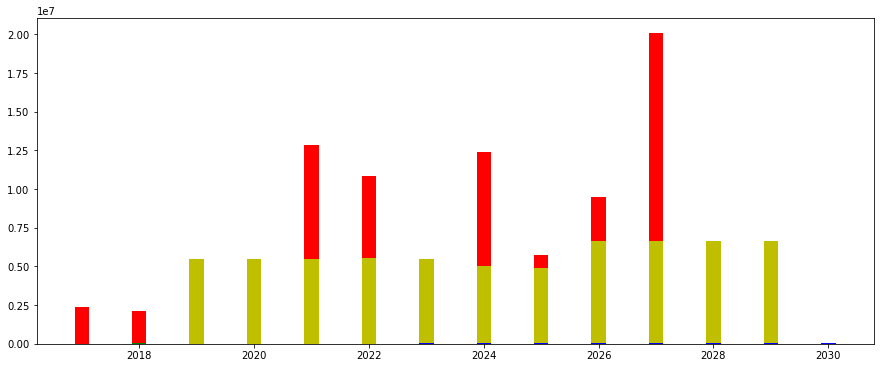

In [158]:
plt.style.use('tableau-colorblind10')
x= df_campeoes_salary_comparison.index
fig,ax=plt.subplots(figsize=(15,6))
ax.bar(x=df_campeoes_salary_comparison.index,height=df_campeoes_salary_comparison['Champion Salary'],width = 0.25,color='r')
ax.bar(x=df_campeoes_salary_comparison.index,height=df_campeoes_salary_comparison['Median Salary'],width = 0.25,color='g')
ax.bar(x=df_campeoes_salary_comparison.index,height=df_campeoes_salary_comparison['Max Salary'],width = 0.25,color='y')
ax.bar(x=df_campeoes_salary_comparison.index,height=df_campeoes_salary_comparison['Min Salary'],width = 0.25,color='b')